# 6.6 Sourcing & Analyzing Time-Series Data

# Contents:
 1. Importing  libraries and data
 2. Subsetting, wrangling, and cleaning time-series data
 3. Time series analysis: decomposition
 4. Testing for stationarity
 5. Stationarizing

## 1. Importing libraries and data

In [123]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

As I my dataset contains time-series data, I will be using it insted of a new dataset from Quandl. 

In [124]:
path = r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_6\02_data\prepared_data'

In [125]:
df = pd.read_csv(os.path.join(path, 'agricultural_methane_emissions_years_final_new.csv'))

In [126]:
df.head(20)

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
0,1971,7819.39,948.33,2267.04,8003.67,13.55,71391.92,1017.12,71299.39,4790.85,...,643214.54,203167.89,16282.50,462081.02,462081.02,251448.90,251446.39,251448.90,1163422.42,2840961.47
1,1972,6672.29,930.32,2302.15,8901.30,13.47,74545.78,1047.96,78476.61,4760.50,...,654075.80,206064.10,16770.15,459594.90,459594.90,256212.48,256209.65,256212.48,1182836.11,2871562.42
2,1973,6960.20,960.89,2260.93,9776.05,13.23,77497.37,1067.61,71135.55,4810.32,...,654901.52,217738.87,17474.05,466486.88,466486.88,270082.52,270079.60,270082.52,1194238.39,2911944.73
3,1974,7378.03,985.79,2352.50,8063.48,12.83,77495.49,1099.75,75657.35,4945.58,...,674127.91,188037.33,17748.55,468547.08,468547.08,238223.69,238220.58,238223.69,1208394.15,2915398.22
4,1975,7836.13,1001.59,2512.39,10215.46,12.78,79162.96,1129.59,81516.08,4934.70,...,683966.76,210797.27,18043.21,477161.86,477161.86,261745.93,261742.64,261745.93,1229920.65,2979621.95
5,1976,7954.05,1062.28,2459.48,8601.50,12.80,81324.55,1130.86,86607.28,4891.35,...,683092.77,206048.57,17575.70,474672.77,474672.77,256464.56,256461.25,256464.56,1253881.16,2992540.36
6,1977,7781.35,1100.96,2696.95,10360.98,12.91,84699.39,1134.36,81711.86,4949.29,...,675178.55,232401.61,19022.06,484468.07,484468.07,286659.49,286656.40,286659.49,1248804.65,3022537.34
7,1978,7719.37,1168.09,2841.67,11075.28,15.49,80597.94,1156.88,72367.10,4994.43,...,664422.25,227305.46,18907.18,491679.26,491679.26,279801.49,279798.19,279801.49,1232434.36,3002825.73
8,1979,7541.71,1217.13,3133.01,15643.85,19.38,79536.52,1171.21,75951.25,5103.54,...,666747.41,266375.09,20035.06,492598.82,492598.82,322525.75,322522.27,322525.75,1229392.08,3039479.46
9,1980,7450.50,1257.07,3280.73,12320.03,22.06,78082.19,1179.23,77142.66,5075.16,...,675399.72,266210.45,19584.57,491552.94,491552.94,322252.14,322248.46,322252.14,1243881.18,3072596.43


In [127]:
# Getting a list of all the column names
print(list(df.columns))

['Unnamed: 0', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'I

In [128]:
df.shape

(48, 224)

In [129]:
df.columns

Index(['Unnamed: 0', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Post-demographic dividend', 'Pre-demographic dividend', 'Small states',
       'South Asia', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World'],
      dtype='object', length=224)

In [130]:
type(df)

pandas.core.frame.DataFrame

## 2. Subsetting, wrangling, and cleaning time-series data

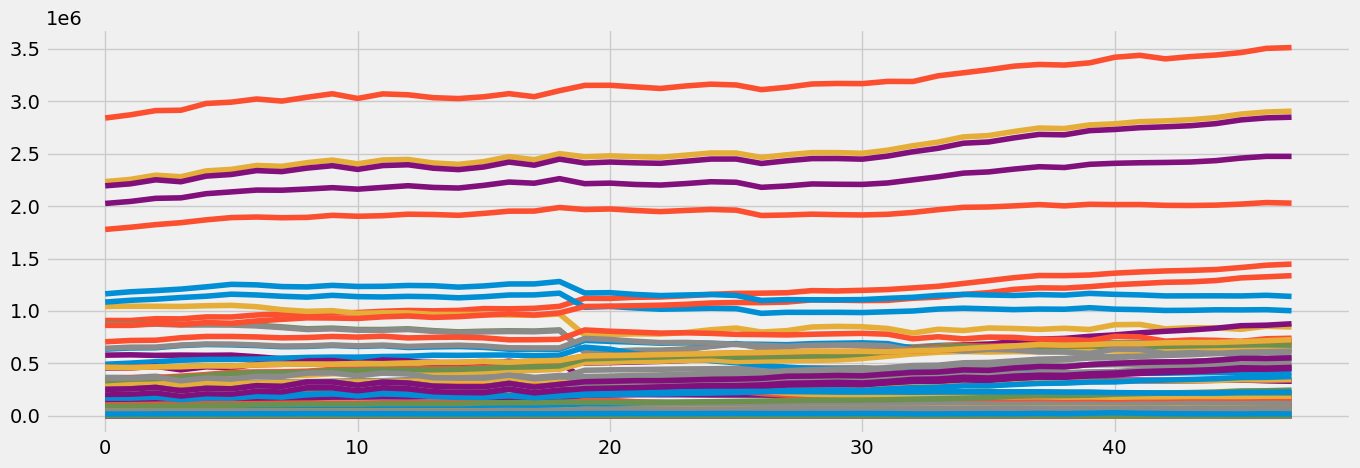

In [131]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

In [132]:
# Creating the subset
df_subset = df[['Unnamed: 0', 'European Union']]

In [133]:
# Creating the subset with only the 2  columns I would like to analyse
df_subset.rename(columns = {'Unnamed: 0' : 'Year'}, inplace = True)

In [134]:
df_subset.head()

,Year,European Union
0,1971,225872.14
1,1972,228564.94
2,1973,235396.48
3,1974,241538.63
4,1975,243256.73


In [135]:
# Checking for min values in my df
df_subset['Year'].min()

1971

In [136]:
# Checking for min values in my df
df_subset['Year'].max()

2018

I will use the timeframe available- 1971-2018. There are not forecasted values in my dataset or any irrelevant historical eventd that would bias my analysis.
Since European Union is one of the regions I have been focusing the most during my analysis, I would be interested to see the results of the time series analysis of this data point. 

In [137]:
# Set the "Date" column as the index
df_subset_final= df_subset.set_index(df_subset['Year'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Year', 1)

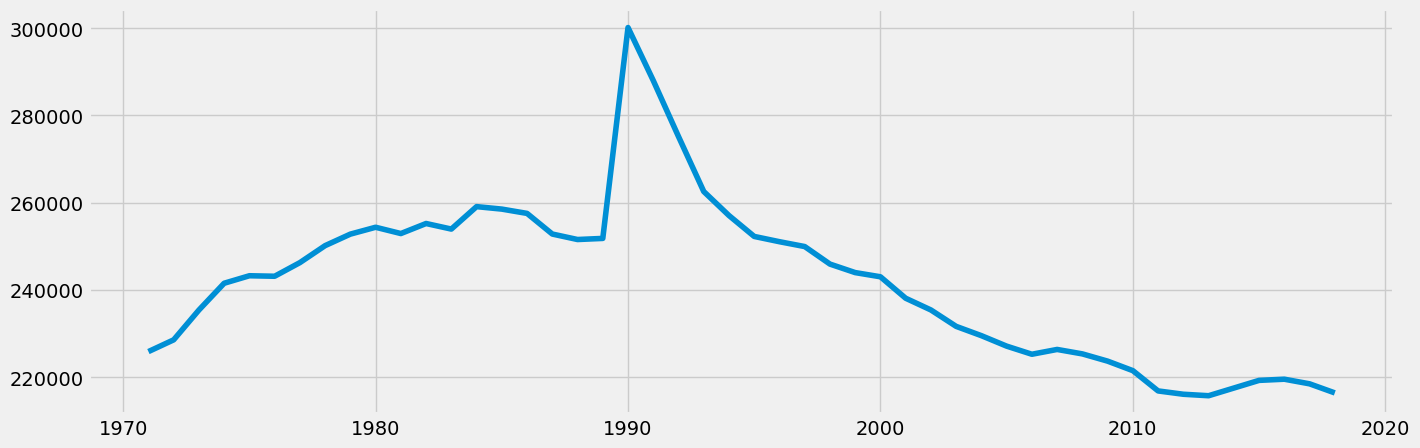

In [138]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_subset_final)

In [139]:
# Check for missing values (you shouldn't have any)
df_subset_final.isnull().sum() 

European Union    0
dtype: int64

In [140]:
# Check for duplicates
dups = df_subset_final.duplicated()
dups.sum()

# No dups!

0

## 3. Time-series analysis: decomposition

In [141]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_subset_final, model='additive',period= 24)

In [142]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 20, 8

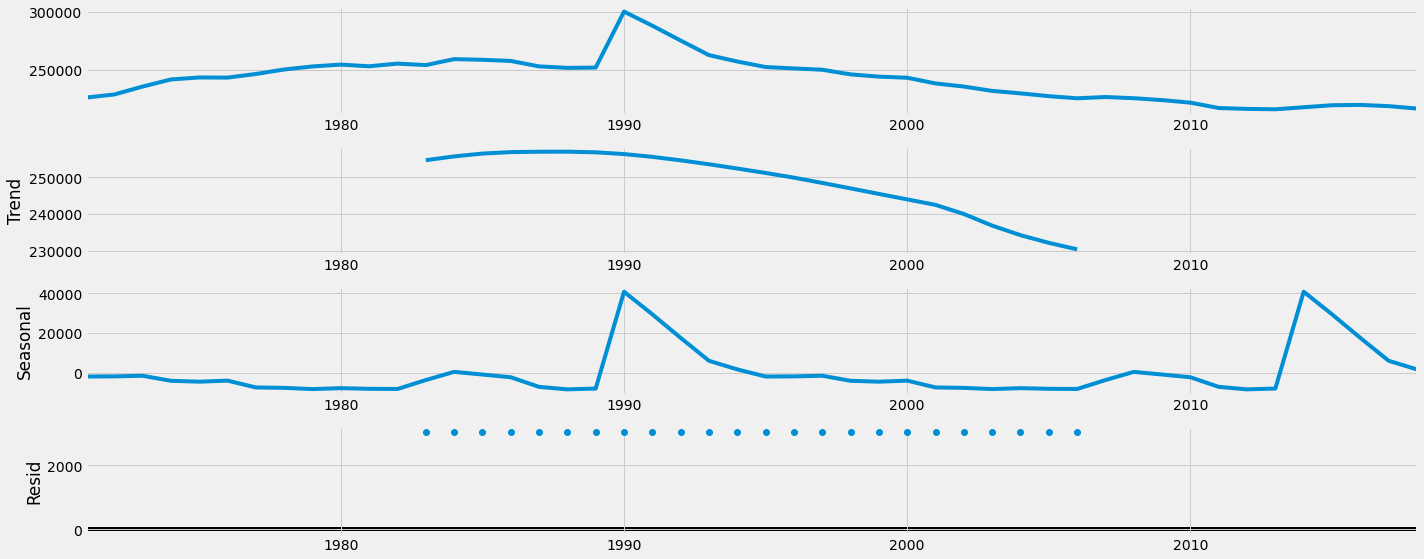

In [143]:
# Plot the separate components

decomposition.plot()
plt.show()

What the decomposition shows us is three components: the underlying trend, the seasonality, and the noise (with an additional fourth component that simply represents the original data for comparison).

The first chart in the figure above is the data itself (including all of its components). This is called the level.

The second is the underlying trend. Note- If we are working with unsmoothed data, our level and trend would differ. If we are working with data that doesn’t have much noise (and, thus, didn’t need to be smoothed), the level and trend would appear the same. In our case, since they are different- it shows us that there is noise in the data. The trend in the chart above gradually drops in a linear fashion after 2000.

The third component is the seasonality. Here, what we would usually see are seasonal fluctuations represented by a spikey curve that would changes at a regular interval. Our case is one of the rare cases that don’t have any seasonality as the curve is mostly flat. I believe this to be normal since we are measuring agricultural methane emissions.

And finally comes the noise—or, as it’s called here, “residual.” This is basically what’s left of the data after the trend and seasonality have been extracted (hence the term residual). As we already noticed in the trend, there is some noise present, hense the result here. 

## 4. Testing for stationarity

In [144]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_subset_final['European Union'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.324023
p-value                         0.618111
Number of Lags Used             0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


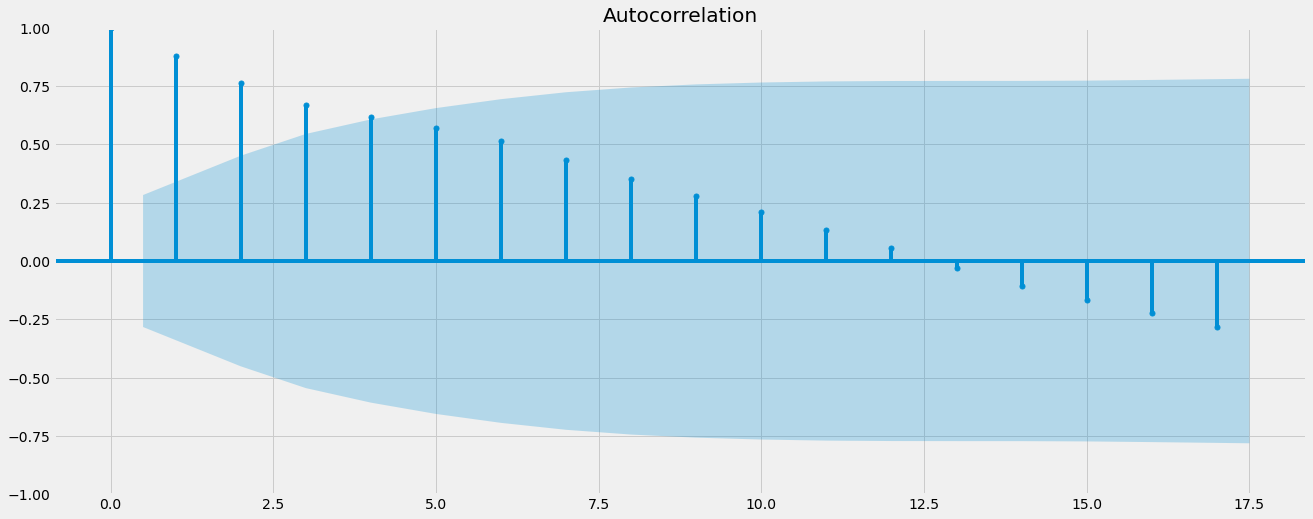

In [145]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_subset_final)
plt.show()

The Test Statistic value of -1.324023 is much larger than all of the critical values hense I cannot reject the null hypothesis.
This means that my data is non-stationary.

Looking at the Autocorrelations: The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When the lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And when I have many lags beyond this interval, I can confirm that my data is non-stationary. This also supports the result of the Dickey-Fuller test.

## 5. Stationarizing

In [146]:
data_diff = df_subset_final - df_subset_final.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [147]:
data_diff.dropna(inplace = True) # Here, I remove the missing values that came about as a result of the differencing. 
# I need to remove these or you won't be able to run the Dickey-Fuller test.

In [148]:
data_diff.head()

,European Union
Year,
1972,2692.80
1973,6831.54
1974,6142.15
1975,1718.10
1976,-114.88


In [149]:
data_diff.columns

Index(['European Union'], dtype='object')

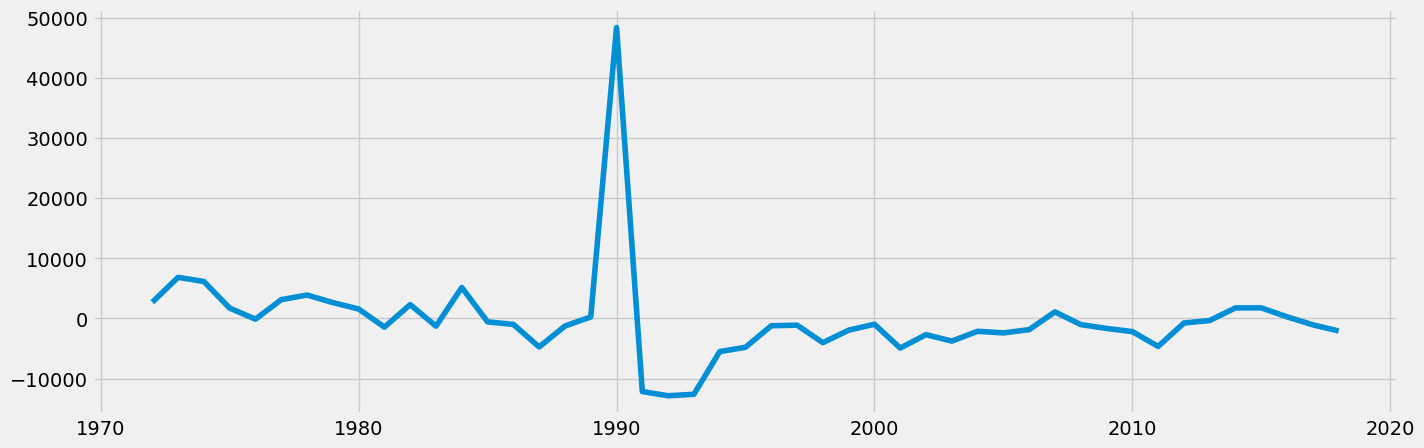

In [150]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [151]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.608572e+00
p-value                        6.462890e-09
Number of Lags Used            0.000000e+00
Number of Observations Used    4.600000e+01
Critical Value (1%)           -3.581258e+00
Critical Value (5%)           -2.926785e+00
Critical Value (10%)          -2.601541e+00
dtype: float64


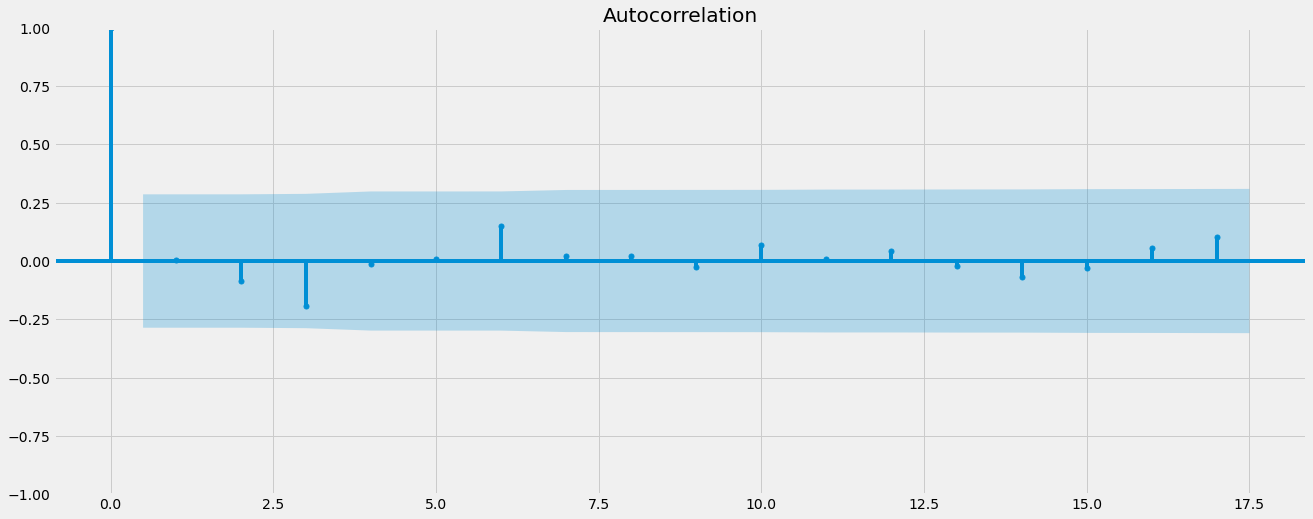

In [152]:
plot_acf(data_diff)
plt.show()

The test statistic is now much smaller than the critical values hense I can reject null hypothesis.
However looking into the Autocorrelation results, they show else. This means that despite the Dickey-Fuller test says that the data is stationary, that stationarity is weak. 